 ### <center> Лабораторна робота №5 <center>

In [58]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Завантаження csv файлів

In [59]:
data_train = pd.read_csv('adult_train.csv', sep=';')
data_test = pd.read_csv('adult_test.csv', sep=';') 

### Перевірка 1,2,3:

In [60]:
data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [61]:
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


### Прибрати зайве

In [62]:
# необхідно прибрати рядки з неправильними мітками в тестовій вибірці
data_test = data_test[(data_test['Target'] == ' >50K.') 
                      | (data_test['Target']==' <=50K.')]


In [63]:
# перекодуємо target в числове поле

data_train['Target'] = data_train['Target'].replace({' <=50K': 0, ' >50K': 1})
data_test['Target'] = data_test['Target'].replace({' <=50K.': 0, ' >50K.': 1})

### Первинний аналіз даних

In [64]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
data_train['Target'].value_counts()

Target
0    24720
1     7841
Name: count, dtype: int64

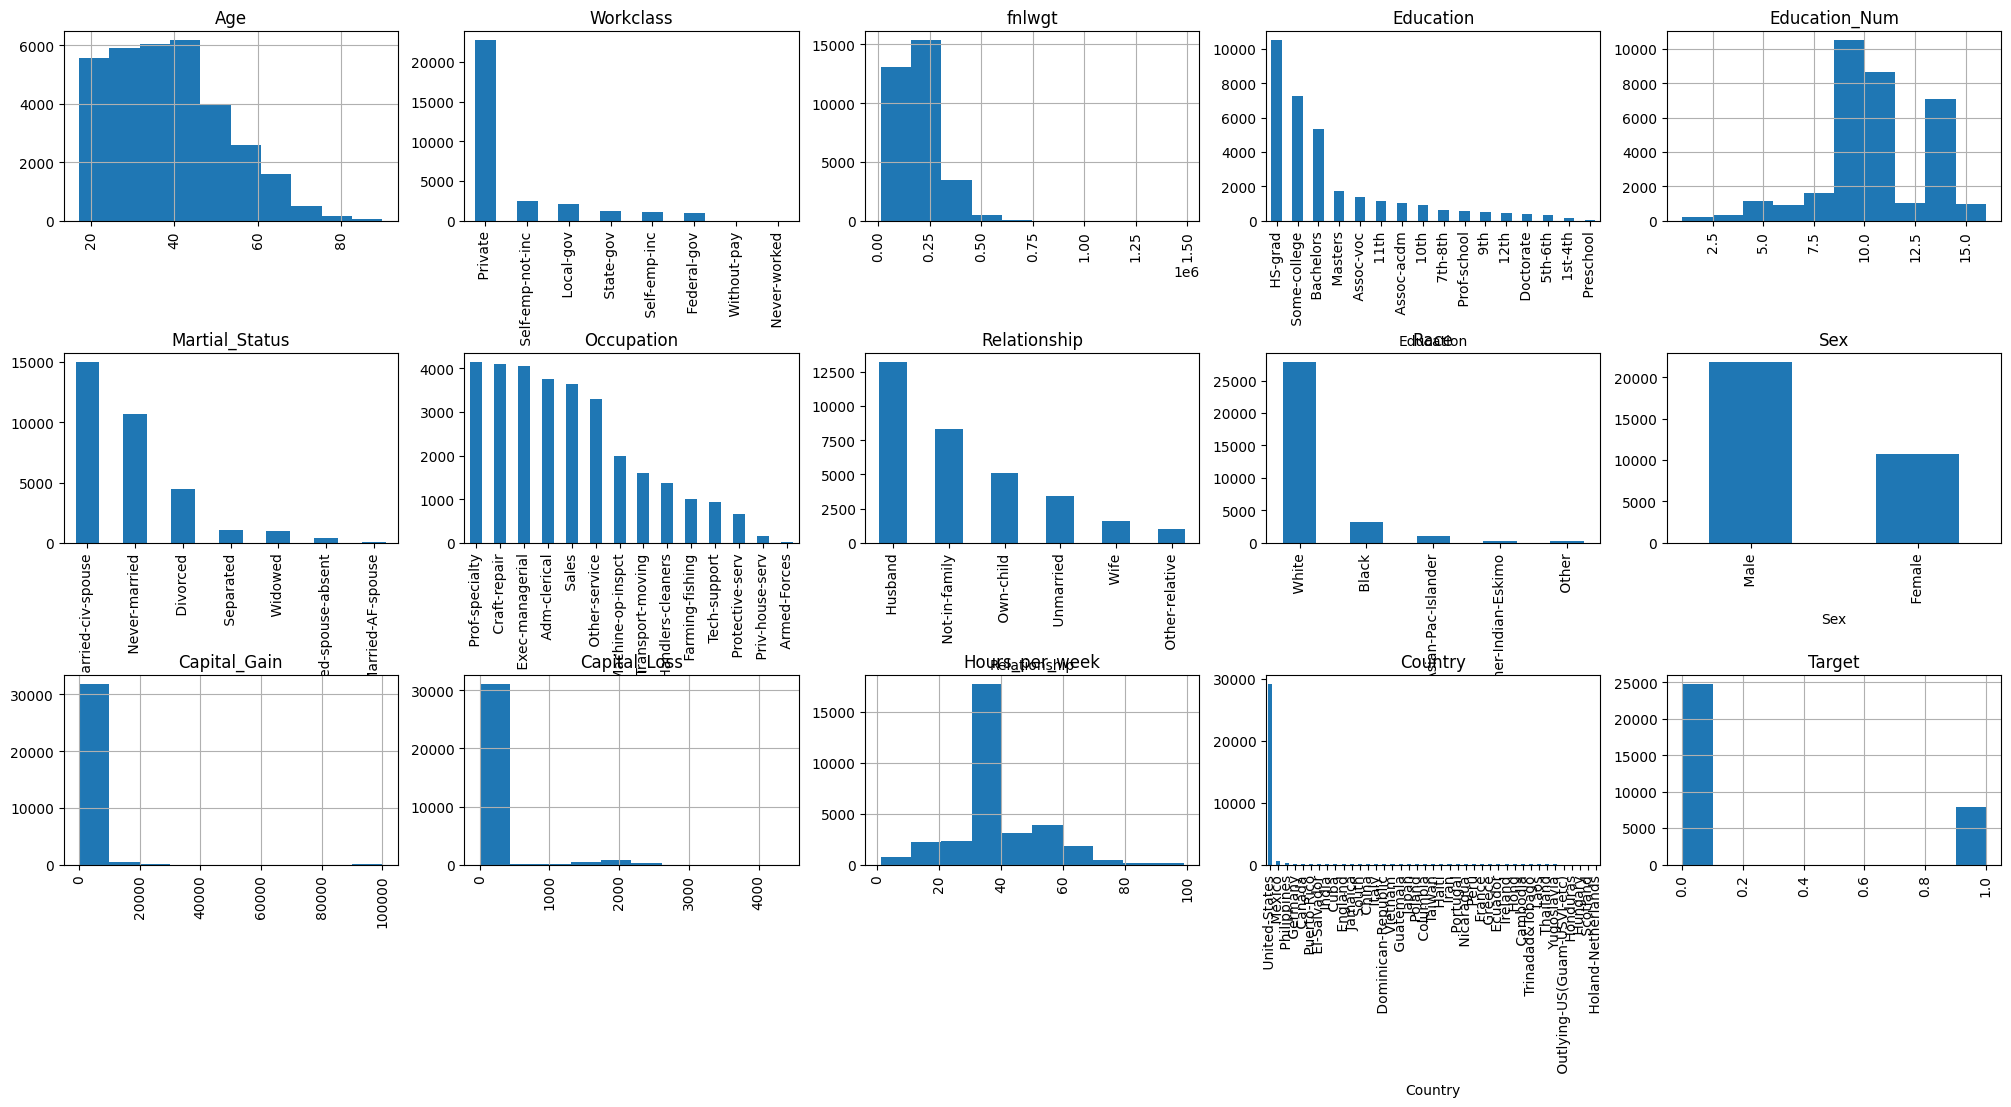

In [66]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = data_train.shape[1] // cols + 1  # Вираховуємо кількість рядків

for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == object:  # Оновлений рядок (застарілий код пропонувал ивикористана альтернатива)
        data_train[column].value_counts().plot(kind="bar", ax=ax)
    else:
        data_train[column].hist(ax=ax)
        plt.xticks(rotation="vertical")

plt.subplots_adjust(hspace=0.7, wspace=0.2)

### Перевіряємо типи даних

In [67]:
data_train.dtypes

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object

In [68]:
data_test.dtypes

Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target              int64
dtype: object

In [69]:
### Змінюємо типи даних деяких стовпців

data_test['Age'] = data_test['Age'].astype(int)
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

data_test.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Заповнимо пропуски в кількісних полях медіанним значенням, а в категоріальних - значенням, що найчастіше зустрічається

In [70]:
# виділимо в вибірках категоріальні і числові поля

categorical_columns_train = [c for c in data_train.columns 
                             if data_train[c].dtype.name == 'object']
numerical_columns_train = [c for c in data_train.columns 
                           if data_train[c].dtype.name != 'object']

categorical_columns_test = [c for c in data_test.columns 
                            if data_test[c].dtype.name == 'object']
numerical_columns_test = [c for c in data_test.columns 
                          if data_test[c].dtype.name != 'object']

print('categorical_columns_test:', categorical_columns_test)
print('categorical_columns_train:', categorical_columns_train)
print('numerical_columns_test:', numerical_columns_test)
print('numerical_columns_train:', numerical_columns_train)


data_test.describe(include='all').T


categorical_columns_test: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
categorical_columns_train: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
numerical_columns_test: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']
numerical_columns_train: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# заповнимо пропуски

for c in categorical_columns_train:
    data_train[c] = data_train[c].fillna(data_train[c].mode())
for c in categorical_columns_test:
    data_test[c] = data_test[c].fillna(data_train[c].mode())
    
for c in numerical_columns_train:
    data_train[c] = data_train[c].fillna(data_train[c].median())
for c in numerical_columns_test:
    data_test[c] = data_test[c].fillna(data_train[c].median())    

data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Кодуємо категоріальні ознаки 'Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'. А саме претворення кількісних ознак в бінарні. 
### Це можна зробити за допомогою методу pandas get_dummies.

In [72]:
data_train = pd.concat([data_train, pd.get_dummies(data_train['Workclass'], 
                                                   prefix="Workclass"),
                      pd.get_dummies(data_train['Education'], prefix="Education"),
                      pd.get_dummies(data_train['Martial_Status'], prefix="Martial_Status"),
                      pd.get_dummies(data_train['Occupation'], prefix="Occupation"),
                      pd.get_dummies(data_train['Relationship'], prefix="Relationship"),
                      pd.get_dummies(data_train['Race'], prefix="Race"),
                      pd.get_dummies(data_train['Sex'], prefix="Sex"),
                      pd.get_dummies(data_train['Country'], prefix="Country")],
                     axis=1)

data_test = pd.concat([data_test, pd.get_dummies(data_test['Workclass'], prefix="Workclass"),
                      pd.get_dummies(data_test['Education'], prefix="Education"),
                      pd.get_dummies(data_test['Martial_Status'], prefix="Martial_Status"),
                      pd.get_dummies(data_test['Occupation'], prefix="Occupation"),
                      pd.get_dummies(data_test['Relationship'], prefix="Relationship"),
                      pd.get_dummies(data_test['Race'], prefix="Race"),
                      pd.get_dummies(data_test['Sex'], prefix="Sex"),
                      pd.get_dummies(data_test['Country'], prefix="Country")],
                     axis=1)

data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...
Country_ Thailand,16281,2,False,16269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_ Trinadad&Tobago,16281,2,False,16273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_ United-States,16281,2,True,14662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_ Vietnam,16281,2,False,16262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
data_train.drop(['Workclass', 'Education', 'Martial_Status',
                 'Occupation', 'Relationship', 'Race', 'Sex', 'Country'],
                axis=1, inplace=True)
data_test.drop(['Workclass', 'Education', 'Martial_Status', 'Occupation', 
                'Relationship', 'Race', 'Sex', 'Country'],
               axis=1, inplace=True)

In [74]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281.0,NaN,NaN,NaN,38.767459,13.849187,17.0,28.0,37.0,48.0,90.0
fnlwgt,16281.0,NaN,NaN,NaN,189435.677784,105714.907671,13492.0,116736.0,177831.0,238384.0,1490400.0
Education_Num,16281.0,NaN,NaN,NaN,10.072907,2.567545,1.0,9.0,10.0,12.0,16.0
Capital_Gain,16281.0,NaN,NaN,NaN,1081.905104,7583.935968,0.0,0.0,0.0,0.0,99999.0
Capital_Loss,16281.0,NaN,NaN,NaN,87.899269,403.105286,0.0,0.0,0.0,0.0,3770.0
...,...,...,...,...,...,...,...,...,...,...,...
Country_ Thailand,16281,2,False,16269,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_ Trinadad&Tobago,16281,2,False,16273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_ United-States,16281,2,True,14662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country_ Vietnam,16281,2,False,16262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
set(data_train.columns) - set(data_test.columns)

{'Country_ Holand-Netherlands'}

In [76]:
data_train.shape, data_test.shape

((32561, 106), (16281, 105))

### У тестовій вибірці не виявилося Голландії. Заведемо необхідну ознаку з нулів.

In [77]:
data_test['Country_ Holand-Netherlands'] = np.zeros([data_test.shape[0], 1])

In [78]:
set(data_train.columns) - set(data_test.columns)

set()

In [79]:
data_train.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [80]:
data_test.head(2)

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Target,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,...,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia,Country_ Holand-Netherlands
1,25,226802,7,0,0,40,0,False,False,False,...,False,False,False,False,False,False,True,False,False,0.0
2,38,89814,9,0,0,50,0,False,False,False,...,False,False,False,False,False,False,True,False,False,0.0


In [81]:
X_train=data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test=data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

### Дерево рішень без налаштування параметрів

In [82]:
# Створення моделі дерева рішень з максимальною глибиною 3 та random_state=17
tree = DecisionTreeClassifier(max_depth=3, random_state=17)

# Навчання моделі на тренувальних даних
tree.fit(X_train, y_train)  # Потрібно вказати X_train та y_train відповідно

### Якщо "The feature names should match those that were passed during fit"

### Визначити порядок ознак, на яких була навчена модель

feature_names = X_train.columns
feature_names



Index(['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss',
       'Hours_per_week', 'Workclass_ Federal-gov', 'Workclass_ Local-gov',
       'Workclass_ Never-worked', 'Workclass_ Private',
       ...
       'Country_ Portugal', 'Country_ Puerto-Rico', 'Country_ Scotland',
       'Country_ South', 'Country_ Taiwan', 'Country_ Thailand',
       'Country_ Trinadad&Tobago', 'Country_ United-States',
       'Country_ Vietnam', 'Country_ Yugoslavia'],
      dtype='object', length=105)

In [83]:
### Перевірити і впорядкувати ознаки в X_test так, щоб вони відповідали порядку ознак у feature_names
X_test = X_test[feature_names]

X_test

,Age,fnlwgt,Education_Num,Capital_Gain,Capital_Loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Country_ Portugal,Country_ Puerto-Rico,Country_ Scotland,Country_ South,Country_ Taiwan,Country_ Thailand,Country_ Trinadad&Tobago,Country_ United-States,Country_ Vietnam,Country_ Yugoslavia
1,25,226802,7,0,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,89814,9,0,0,50,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
3,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,44,160323,10,7688,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
5,18,103497,10,0,0,30,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16277,39,215419,13,0,0,36,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
16278,64,321403,9,0,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
16279,38,374983,13,0,0,50,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
16280,44,83891,13,5455,0,40,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False


In [84]:
# Оцінити якість моделі на тестових даних
accuracy = tree.score(X_test, y_test)  # Потрібно вказати X_test та y_test відповідно

# Вивести результат
print(f'Accuracy на тестовій вибірці: {accuracy:.2f}')

Accuracy на тестовій вибірці: 0.84


### Дерево рішень з налаштуванням параметрів

In [85]:
# Створення екземпляра моделі DecisionTreeClassifier з встановленим random_state

tree = DecisionTreeClassifier(random_state=17)

In [86]:
# Налаштувати параметр max_depth, створити словник зі значеннями, які хочемо перевірити
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]
}

In [87]:
# Створbnb екземпляр GridSearchCV і передаnb модель, словник параметрів та кількість перекриттів (cv) для крос-валідації
grid_search = GridSearchCV(tree, param_grid, cv=5)

In [88]:
# Навчити GridSearchCV на тренувальних даних:

In [89]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=17),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]})

In [90]:
# Перевірити найкращий параметр max_depth:

best_max_depth = grid_search.best_params_['max_depth']
print(f'Найкраща максимальна глибина: {best_max_depth}')

Найкраща максимальна глибина: 9


In [91]:
# Тепер best_max_depth міститиме значення, яке давало найкращий результат на крос-валідації. 
# Можна використовувати це значення для навчання моделі DecisionTreeClassifier з оптимальною глибиною

#tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=17)
#tree.fit(X_train, y_train)

### Навчіть на наявній вибірці дерево рішень максимальної глибини 9 (це краще значення max_depth в моєму випадку) та оцініть частку правильних відповідей на тесті. Використовуйте параметр random_state = 17 для відтворюваності результатів.

In [92]:
# Створення екземпляру моделі навчання
tuned_tree = DecisionTreeClassifier(max_depth=9, random_state=17)

In [93]:
# Використання GridSearchCV для налаштування параметрів моделі. В цьому випадку налаштовуємо лише max_depth. Визначте діапазон для max_depth:
param_grid = {'max_depth': [9]}
grid_search = GridSearchCV(tuned_tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=9, random_state=17),
             param_grid={'max_depth': [9]})

In [94]:
# Отримання найкращих параметрів після налаштування

best_max_depth = grid_search.best_params_['max_depth']

In [95]:
# Навчання моделей за найкращими параметрами тренувальних даних

tuned_tree = DecisionTreeClassifier(max_depth=best_max_depth, random_state=17)
tuned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=17)

In [96]:
# Оцінка частки правильних відповідей на тестових даних

tuned_tree_predictions = tuned_tree.predict(X_test)
result = (y_test == tuned_tree_predictions).mean()

In [97]:
# Результат

print(f'Accuracy на тестовій вибірці із глибиною 9: {result:.2f}')

Accuracy на тестовій вибірці із глибиною 9: 0.86


### Випадковий ліс без налаштування параметрів (опціонально)

#### Навчіть на наявній вибірці випадковий ліс (RandomForestClassifier), число дерев зробіть рівним ста, аrandom_state = 17.

In [98]:
rf = RandomForestClassifier(n_estimators=100, random_state=17)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=17)

### Зробіть за допомогою отриманої моделі прогноз для тестової вибірки.

In [99]:
# Примітка: НЕ ВИКОРИСТОВУВАТИ ім'я змінної в деревах рішень accuracy_score це ім'я функції з бібліотеки sklearn


# Зробіть прогнози для тестових даних
forest_predictions = rf.predict(X_test)

# Оцініть частку правильних відповідей на тестових даних
accuracy = accuracy_score(y_test, forest_predictions)

# Виведіть результат
print(f'Accuracy на тестовій вибірці: {accuracy:.2f}')

Accuracy на тестовій вибірці: 0.85


###  Випадковий ліс з налаштуванням параметрів

In [107]:
# Оголосити параметри forest_params, які хочемо налаштувати, такі як max_depth та max_features

forest_params = {'max_depth': range(10, 15),
                'max_features': range(5, 25, 10)}

In [108]:
# Створити модель RandomForestClassifier, яку будемо налаштовувати:

rf = RandomForestClassifier(random_state=17)

In [109]:
# Створити об'єкт GridSearchCV для пошуку оптимальних параметрів:

locally_best_forest = GridSearchCV(estimator=rf, param_grid=forest_params, cv=5)

In [112]:
# Навчити locally_best_forest на тренувальних даних:

from tqdm import tqdm

n_iterations = 10 
for i in tqdm(range(n_iterations), desc="Навчання"):
    locally_best_forest.fit(X_train, y_train)  

Навчання: 100%|██████████| 10/10 [26:30<00:00, 159.09s/it]


In [113]:
print("Best params:", locally_best_forest.best_params_)
print("Best cross validaton score", locally_best_forest.best_score_)

Best params: {'max_depth': 14, 'max_features': 15}
Best cross validaton score 0.8623200867212842


### Зробіть за допомогою отриманої моделі прогноз для тестової вибірки.

In [114]:
tuned_forest_predictions = locally_best_forest.predict(X_test) # Ваш код тут
accuracy = accuracy_score(y_test, tuned_forest_predictions)


In [115]:
print('tuned_forest_predictions:', tuned_forest_predictions)
print(f'Accuracy на тестовій вибірці: {accuracy:.2f}')

tuned_forest_predictions: [0 0 0 ... 1 0 1]
Accuracy на тестовій вибірці: 0.86
